In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from glob import glob
import math

import numpy as np
import pandas as pd

In [4]:
root_dir = "../resources/nfl-big-data-bowl-2024/"

In [5]:
games_df = pd.read_csv(root_dir + "games.csv")
players_df = pd.read_csv(root_dir + "players.csv")
plays_df = pd.read_csv(root_dir + "plays.csv")
tackles_df = pd.read_csv(root_dir + "tackles.csv")

In [6]:
tracking_files = []
# tracking data
for i, tracking_filename in enumerate(glob(root_dir + "tracking*.csv")):
  file = pd.read_csv(tracking_filename)
  tracking_files.append(file)
tracking_df = pd.concat(tracking_files, ignore_index=True)

In [7]:
games_df.head(5)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [8]:
players_df.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [9]:
plays_df.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [10]:
tackles_df.head(5)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [11]:
tracking_df.head(5)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022100600,90,33084.0,Matt Ryan,1,2022-10-06 20:17:04.799999,2.0,IND,left,90.42,23.74,0.11,0.04,0.03,271.98,257.76,NaN
1,2022100600,90,33084.0,Matt Ryan,2,2022-10-06 20:17:04.900000,2.0,IND,left,90.39,23.74,0.14,0.06,0.03,272.84,256.68,NaN
2,2022100600,90,33084.0,Matt Ryan,3,2022-10-06 20:17:05.000000,2.0,IND,left,90.36,23.73,0.17,0.09,0.03,272.84,254.91,NaN
3,2022100600,90,33084.0,Matt Ryan,4,2022-10-06 20:17:05.099999,2.0,IND,left,90.32,23.73,0.19,0.11,0.04,275.80,260.06,NaN
4,2022100600,90,33084.0,Matt Ryan,5,2022-10-06 20:17:05.200000,2.0,IND,left,90.28,23.72,0.20,0.13,0.04,275.80,257.79,NaN


In [12]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["frameId"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81]


In [13]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["event"])

8223164             NaN
8223165    pass_arrived
8223166             NaN
8223167             NaN
8223168             NaN
               ...     
8302371          tackle
8302372             NaN
8302373             NaN
8302374             NaN
8302375             NaN
Name: event, Length: 79212, dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


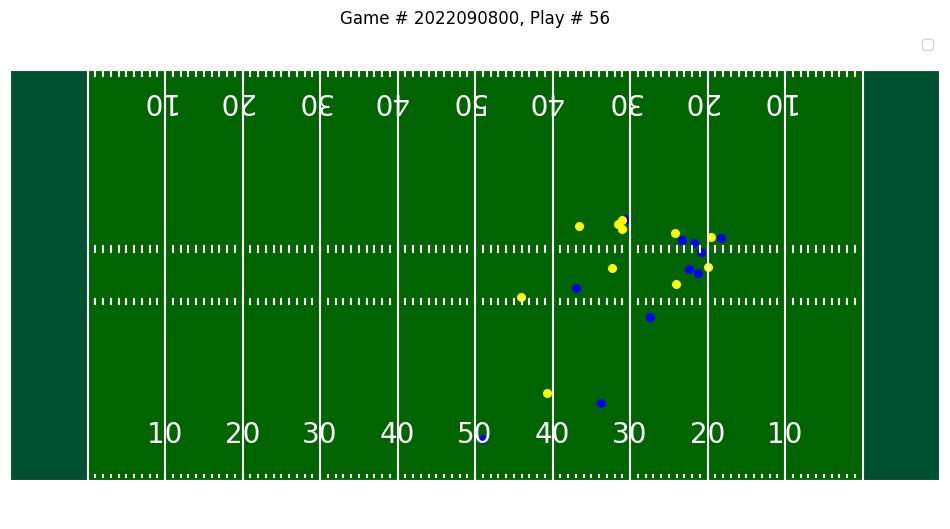

In [35]:
import matplotlib.pyplot as plt
from src.utils import create_football_field
%matplotlib inline
fig, ax =create_football_field()

tracking_df.query("gameId == 2022090800 and playId == 56 and frameId == 22 and club == 'BUF'").plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Away')
tracking_df.query("gameId == 2022090800 and playId == 56 and frameId == 22 and club == 'LA'").plot(x='x', y='y', kind='scatter', ax=ax, color='yellow', s=30, legend='Home')
plt.title('Game # 2022090800, Play # 56')
plt.legend()
plt.show()

In [121]:
frame_max, frame_min = -1, 100000

tracking_df.drop(tracking_df[tracking_df["displayName"] == "football"].index, inplace=True)
frame_data = []
print(len(tracking_df.groupby(["gameId", "playId"])))
for i, (gameId, grouped_game) in enumerate(tracking_df.groupby(["gameId", "playId"])):
    current_frames = []
    if "tackle" not in grouped_game["event"].values:
         continue
    if len(grouped_game["frameId"].unique()) < 50:
           continue
    if len(grouped_game["frameId"].unique()) > 100:
          continue

    frame_max = max(frame_max, len(grouped_game["frameId"].unique()))
    frame_min = min(frame_min, len(grouped_game["frameId"].unique()))
    frames = grouped_game["frameId"].unique()
    for frame in frames:
        current_frames.append(
             grouped_game[grouped_game.frameId == frame]
             )
    
    frame_data.append(current_frames)
    if len(frame_data) > 2:
         break

12483


In [122]:
print(f"Batches: {len(frame_data)}")
print(f"Number of frames: {len(frame_data[0])}")
print(f"First frame number of nodes: {len(frames)}")
print(tracking_df.columns)

# (frames, num_nodes, num_features)
data = None

for lst_of_frames in frame_data:
    print(len(lst_of_frames))
for lst_of_frames in frame_data:
    seq_list = None
    for frames in lst_of_frames:
        frame = frames.sort_values(by="nflId")
        x_vals = frame[["x"]].values / 120
        y_vals = frame[["y"]].values / 53.3
        s_vals = (frame[["s"]] - lst_of_frames[0][["s"]].mean())/lst_of_frames[0][["s"]].std()
        a_vals = (frame[["a"]] - lst_of_frames[0][["a"]].mean())/lst_of_frames[0][["a"]].std()
        dis_vals = frame[["dis"]].values
        o_vals = frame[["o"]].values / 360
        dir_vals = frame[["dir"]].values / 360
        merged_games = pd.merge(games_df, frame, left_on='gameId', right_on='gameId')
        is_home = np.where(merged_games["homeTeamAbbr"].values  == merged_games["club"].values, 1, 0)[..., np.newaxis]
        current = np.concatenate(
            [x_vals, y_vals, s_vals, a_vals, dis_vals, o_vals, dir_vals, is_home], 
            axis=1
            )[np.newaxis, ...]
        # Generate sequences of frames (len_input_seq)
        seq_list = np.concatenate((seq_list, current), axis=0) if seq_list is not None else current
    # Batch sequences of frames (batch_size)
    data = np.concatenate((data, seq_list), axis=0) if data is not None else seq_list[np.newaxis, ...]

Batches: 3
Number of frames: 56
First frame number of nodes: 53
Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event'],
      dtype='object')
56
51
53
(51, 22, 8)
(1, 56, 22, 8)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)

In [98]:
print(data.shape)

(160, 22, 8)


In [16]:
import nfl_data_py as nfl
nfl.see_pbp_cols()

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [56]:
print(frame.head())

             gameId  playId    nflId      displayName  frameId  \
8226246  2022090800     146  35472.0   Rodger Saffold        1   
8226302  2022090800     146  38577.0     Bobby Wagner        1   
8226358  2022090800     146  41239.0     Aaron Donald        1   
8226414  2022090800     146  42392.0      Mitch Morse        1   
8226470  2022090800     146  42448.0  Jamison Crowder        1   

                               time  jerseyNumber club playDirection      x  \
8226246  2022-09-08 20:26:29.400000          76.0  BUF          left  59.86   
8226302  2022-09-08 20:26:29.400000          45.0   LA          left  53.77   
8226358  2022-09-08 20:26:29.400000          99.0   LA          left  57.99   
8226414  2022-09-08 20:26:29.400000          60.0  BUF          left  59.49   
8226470  2022-09-08 20:26:29.400000          80.0  BUF          left  60.98   

             y     s     a   dis       o     dir event  
8226246  27.81  0.00  0.00  0.00  275.25  218.32   NaN  
8226302  28.06